## "Week of Oct21" HW

### Question 1
The theoretical Simple Linear Regression model is a statistical technique that models the relationship between a predictor variable (independent variable, 𝑋) and an outcome variable (dependent variable, 𝑌) by fitting a linear equation to observed data.

Simple Linear Regression Equation:
𝑌=𝛽0+𝛽1𝑋+𝜖

Where:

𝑌is the outcome (dependent) variable.

𝑋is the predictor (independent) variable.

𝛽0 is the intercept.

𝛽1 is the slope.

ϵ is the random error term.

The error term(𝜖) is assumed to follow a normal distribution with mean 0, i.e., 
𝜖∼𝑁(0,𝜎^2), meaning on average, the errors cancel out (no systematic error).

which further indicates that the outcome variable 𝑌 is also normally distributed around its expected value 
𝑌pred=𝛽0+𝛽1𝑋

This combination of the deterministic linear function and the normally distributed error term ensures that the observed values of Y for each X form a sample from a normal distribution.

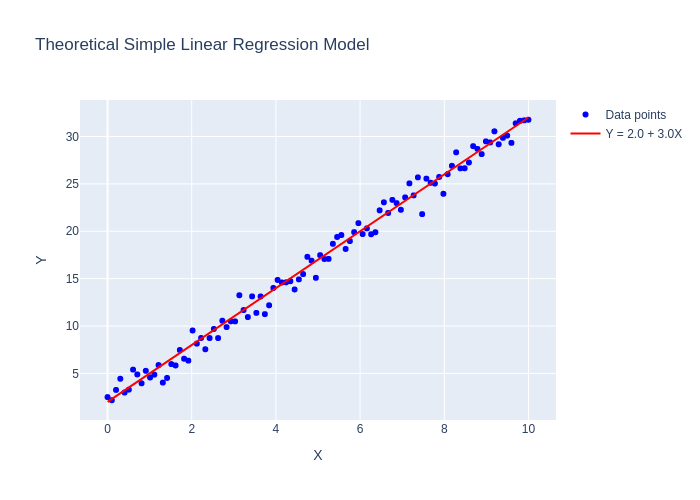

In [1]:
import numpy as np
import plotly.graph_objs as go

np.random.seed(42)

# Generate synthetic data for X and Y
n = 100  # number of observations
X = np.linspace(0, 10, n)  # X is evenly spaced between 0 and 10

# True slope (beta1) and intercept (beta0) of the linear model
beta0 = 2.0  # intercept
beta1 = 3.0  # slope

# Error term (epsilon) drawn from a normal distribution with mean 0 and variance 1 (N(0, 1))
epsilon = np.random.normal(loc=0, scale=1, size=n)

# Generate the outcome variable Y based on the linear model Y = beta0 + beta1*X + epsilon
Y = beta0 + beta1 * X + epsilon

# Create scatter plot for data points
scatter_trace = go.Scatter(x=X, y=Y, mode='markers', name='Data points', marker=dict(color='blue'))

# Create line for the theoretical regression model without error (Y = beta0 + beta1*X)
theoretical_line = go.Scatter(x=X, y=beta0 + beta1 * X, mode='lines', name=f"Y = {beta0} + {beta1}X", line=dict(color='red'))

# Layout configuration
layout = go.Layout(
    title='Theoretical Simple Linear Regression Model',
    xaxis=dict(title='X'),
    yaxis=dict(title='Y'),
    showlegend=True
)

# Combine traces and plot
fig = go.Figure(data=[scatter_trace, theoretical_line], layout=layout)
fig.show(renderer = "png")

### Question 2


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8272      0.181     10.094      0.000       1.468       2.186
x              3.0138      0.031     96.366      0.000       2.952       3.076
Intercept    1.827187
x            3.013793
dtype: float64
[1.82718715 3.01379327]
0.9895572256372697


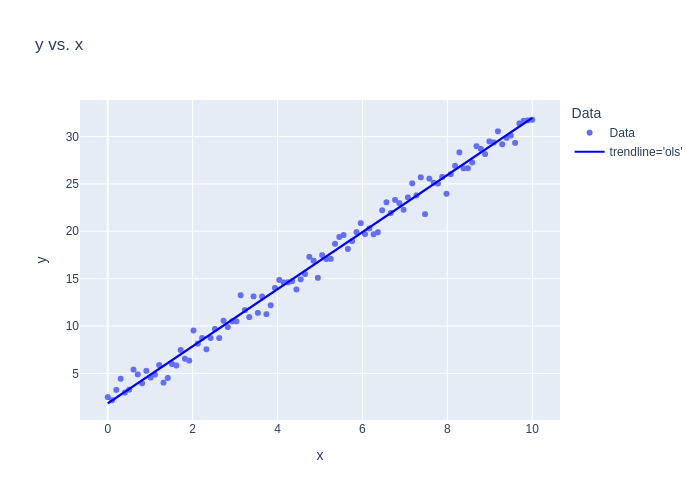

In [2]:
import statsmodels.formula.api as smf  # what is this library for?
# Answer: This library is used for specifying and fitting statistical models using formulas. 
# It provides functionality to fit models like Ordinary Least Squares (OLS), which is used in linear regression.
import pandas as pd
import plotly.express as px  # this is a ploting library

df = pd.DataFrame({'x': X, 'y': Y})
# what are the following two steps doing?
model_data_specification = smf.ols("y~x", data=df) 
# Answer: This line specifies an Ordinary Least Squares (OLS) linear regression model with 'y' as the dependent variable 
# and 'x' as the independent variable using the data in the DataFrame `df`.

fitted_model = model_data_specification.fit() 
# Answer: This line fits the specified OLS model to the data, estimating the regression coefficients (slope and intercept).

# what do each of the following provide?
fitted_model.summary()  # simple explanation?
# Answer: This provides a detailed summary of the fitted regression model, including information like coefficients, 
# R-squared value, p-values, and overall model fit statistics.

print(fitted_model.summary().tables[1])  # simple explanation?
# Answer: This table specifically shows the estimated regression coefficients (intercept and slope), their standard errors,
# t-statistics, and p-values, which help in understanding the significance of the predictors.

print(fitted_model.params)  # simple explanation?
# Answer: This provides the estimated coefficients of the regression model, including both the intercept and the slope.

print(fitted_model.params.values)  # simple explanation?
# Answer: This returns the estimated coefficients (intercept and slope) as an array of numerical values.

print(fitted_model.rsquared)  # simple explanation?
# Answer: This provides the R-squared value, which is a measure of how well the independent variable(s) explain the variability
# in the dependent variable. A value closer to 1 means a better fit.

# what two things does this add onto the figure?
df['Data'] = 'Data'  # hack to add data to legend 
# Answer: This adds a new column to the DataFrame that assigns the label 'Data' to all points, which helps in adding a legend to the plot.
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")
# Answer: This manually adds the trendline (the fitted regression line) to the scatter plot using the predicted values from the fitted model.

fig.show(renderer = "png")  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


### Question 3


/tmp/ipykernel_157/297860205.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



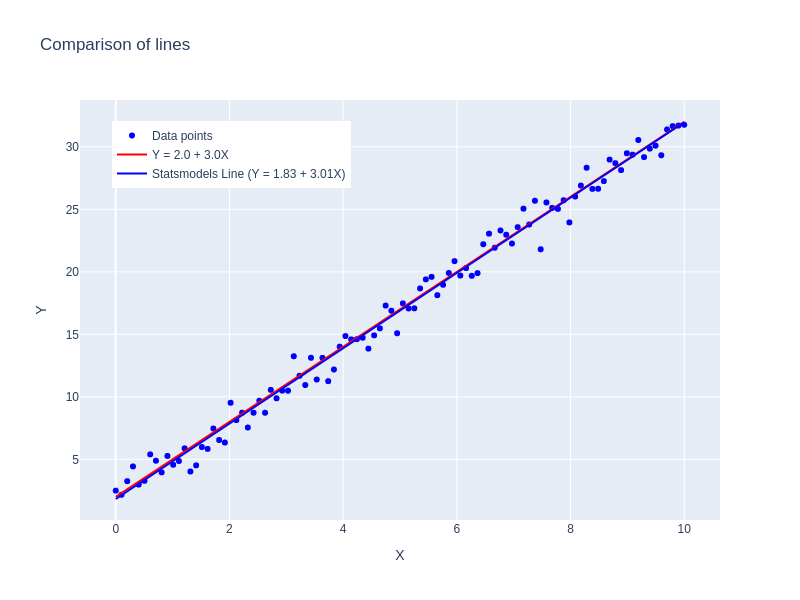

In [3]:
layout = go.Layout(
    title='Comparison of lines',
    xaxis_title='X',
    yaxis_title='Y',
    legend=dict(x=0.05, y=0.95),
    height=600,
    width=800
)
regression_line_statsmodels = fitted_model.fittedvalues
line_trace_statsmodels = go.Scatter(
    x=df['x'], y=regression_line_statsmodels, mode='lines',
    name=f'Statsmodels Line (Y = {fitted_model.params[0]:.2f} + {fitted_model.params[1]:.2f}X)',
    line=dict(color='blue', width=2)
)

fig = go.Figure(data=[scatter_trace, theoretical_line, line_trace_statsmodels], layout=layout)

fig.show(renderer = "png")

The red line shows the theoritical line represents the direct relationship between 𝑋 and 𝑌 based on the true model parameters (𝑌 =𝛽0+𝛽1×𝑋.), without any error term. It provides a baseline or reference line that reflects the intended linear relationship without any random fluctuations, thus representing what the data would look like in an ideal, noiseless scenario.

The blue line represents the best-fit regression line calculated using the actual, noisy data. It is derived from statsmodels, which finds the slope and intercept that minimize the sum of squared differences between the observed values and the fitted line. It models the observed data, taking into account the random noise, and shows how well the linear regression model can approximate the true relationship based on the sampled data points. This fitted line reflects the regression model's approximation of the theoretical line given the sample data, accounting for random variation. Its slope and intercept may differ slightly from the theoretical line due to the influence of noise.

### Question 4
`fitted_model.summary().tables[1]` is a table that displays the estimated coefficients (slope and intercept), their standard errors, t-values, and p-values. It looks something like this

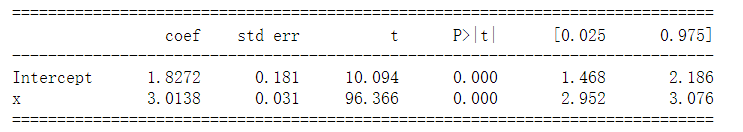

In this case, the estimated value of the intercept(𝛽0) is 1.8272. The estimated value of the slope(𝛽1) is 3.0138.

Therefore, we can derive `fitted_model.fittedvalues` Using the estimated coefficients:

𝛽0=1.8272(intercept)

𝛽1=3.0138(slope)

The formula to compute the fitted values is:

𝑌predicted=1.8272 + 3.0138𝑋


### Question 5

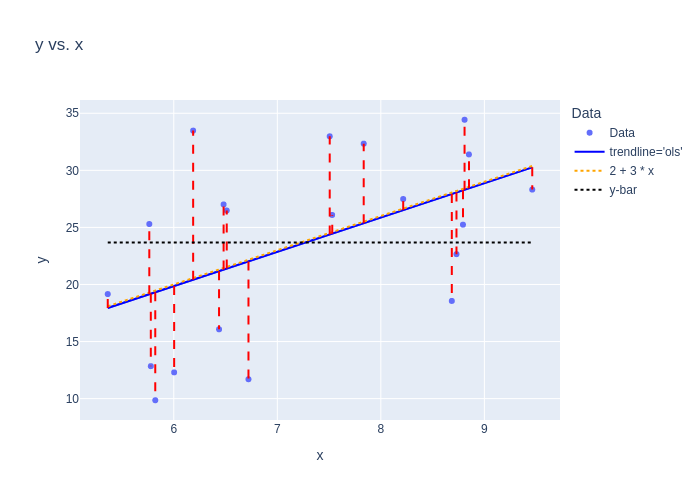

In [19]:
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': y})
model_data_specification = smf.ols("y~x", data=df) 
fitted_model2 = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model2.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model2.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


The OLS method fits a line through the data points in such a way that it minimizes the overall "error" between the actual values (observed data) and the values predicted by the line.
It approaches this by minimizing the sum of the squared differences between the observed values (\( Y_{\text{observed}} \)) and the predicted values (\( Y_{\text{predicted}} \)).

These differences are called residuals or errors, and for each data point, the residual is:

Residual=Yobserved − Ypredicted

To quantify how well a line fits the data, OLS minimizes the sum of the squared residuals*:

Sum of Squared Errors (SSE)= ∑ (Yobserved-i​ −Ypredicted-i​ )^2

Where:
- Yobserved-i is the actual value of \( Y \) for the \( i \)-th data point.
- Ypredicted-i is the value of \( Y \) predicted by the model for the \( i \)-th data point.


OLS minimizes squared residuals rather than just the raw residuals (absolute differences) for several reasons:

1. Avoiding Negative Errors:
   - If you were to minimize the sum of the residuals (without squaring), positive and negative errors would cancel each other out. For instance, if one point is over-predicted (positive error) and another is under-predicted (negative error), their combined error could be zero, even though the model is not fitting the data well. Squaring the errors ensures that all errors are treated as positive, preventing this cancellation.

2. Emphasizing Larger Errors:
   - Squaring the residuals gives greater weight to larger errors. A large error will contribute more to the overall sum, pushing the OLS algorithm to fit the model in a way that minimizes significant deviations from the line. This helps avoid large prediction errors.

In the above visualization:

- The solid blue line is the fitted OLS regression line created using smf.ols().fit(). This is the line that minimizes the sum of squared residuals.
- This is the line that generated the data (with the true errors 𝜖𝑖).
- The red dashed vertical lines show the residuals for each data point. Each residual is the vertical distance between the observed value 𝑦 and the predicted value 𝑦 from the fitted model. The larger the red line, the larger the residual.
-  The black dashed horizontal line represents the mean value of 𝑦, which helps visualize how much the observed data points deviate from the overall mean.

### Summary of Interactions for Q1-Q5: 

Transcript Log: https://chatgpt.com/share/672069e5-778c-8012-ad9c-f53cbaf049ae

**Objective**: We explored the theoretical and practical aspects of Simple Linear Regression, including the process of generating synthetic data, fitting a regression model, and interpreting the results.

1. **Theoretical Model Overview**: 
   - We discussed the theoretical Simple Linear Regression model: \( y = \beta_0 + \beta_1 x + \epsilon \), where \( y \) is the outcome variable, \( x \) is the predictor, \( \beta_0 \) is the intercept, \( \beta_1 \) is the slope, and \( \epsilon \) is the random error term, assumed to follow a normal distribution.
   - The error term \( \epsilon \) accounts for natural variation around the linear trend defined by \( x \) and is critical to simulate realistic data.

2. **Data Simulation**: 
   - Using Python libraries (`numpy`, `scipy.stats`), we generated a synthetic dataset where \( x \) values were uniformly distributed, and \( y \) values were calculated as \( y = \beta_0 + \beta_1 x + \epsilon \), with \( \epsilon \) drawn from a normal distribution.
   - This generated dataset mimics the theoretical relationship between \( x \) and \( y \) for exploration and testing of linear regression.

3. **Fitting the Linear Model with OLS**:
   - We utilized two approaches to fit a linear model to the generated data:
     - **SciPy’s linregress** function.
     - **Statsmodels’ Ordinary Least Squares (OLS)** via `smf.ols`.
   - We verified that both methods yielded near-identical results, with the OLS method returning a fitted line close to the true model line due to minimal error in synthetic data.

4. **Visualizing the Model and Residuals**:
   - Using `Plotly`, we plotted the observed data points, the theoretical regression line, and the fitted OLS line. Both lines overlapped almost perfectly due to the alignment between the data generation and model fitting process.
   - Residuals (differences between observed \( y_i \) and fitted values \( \hat{y}_i \)) were visualized as vertical red lines, illustrating minor deviations, which helped interpret model accuracy and fit quality.

5. **Explanation of Residuals vs. Error Terms**:
   - We differentiated **residuals** (\( e_i = y_i - \hat{y}_i \)) from **theoretical error terms** (\( \epsilon_i \)), emphasizing that residuals measure the difference between observed values and predicted values from the fitted model, while error terms represent true deviations in data generation.

6. **Interpretation of Fitted Model Summary**:
   - We reviewed the `fitted_model.summary().tables[1]`, noting that it contains key statistics like coefficient estimates for the intercept and slope, p-values, and standard errors, which are essential for assessing model parameters.
   - We derived fitted values \( \hat{y}_i \) using the formula from the summary table, confirming that these values align with the observed trend due to accurate slope and intercept estimates.

7. **Why Squares are Minimized in OLS**:
   - The OLS method minimizes the **sum of squared residuals** \( \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \) to achieve the best linear fit, ensuring that positive and negative deviations do not cancel each other and that larger deviations are weighted more, thus finding the line that best represents the data.

### Question 6

In [5]:
1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()

0.9895572256372697

In [6]:
fitted_model.rsquared

0.9895572256372697

In [7]:
np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2

0.9895572256372703

In [8]:
np.corrcoef(Y,X)[0,1]**2

0.9895572256372698

The first expression calculates the proportion of variation in Y that is explained by the model. It does so by comparing the total variation in Y (measured by the sum of squared deviations from the mean of Y) with the variation that remains unexplained by the model (measured by the sum of squared residuals).

The expression can be broken down as follows:

- ((Y-Y.mean())**2): This is the total variation in Y (or the Total Sum of Squares (TSS)).
- ((Y-fitted_model.fittedvalues)**2): This is the variation left unexplained by the model, also known as the Residual Sum of Squares (RSS).
- Dividing the RSS by the TSS gives us the proportion of variation in 𝑌 that is not explained by the model. Subtracting this value from 1 gives the proportion that is explained by the model, often referred to as the coefficient of determination or 𝑅^2. 

Therefore, this expression can be interpreted as the proportion of variation in Y explained by the model and is a measure of how well the model fits the data.

The second expression directly computes this proportion of variance explained in the first expression. In the context of linear regression, 𝑅^2 is a measure of how well the model explains the variability of 𝑌. Its value ranges from 0 to 1:

- An 𝑅^2 of 0 means the model explains none of the variation in 𝑌.
- An 𝑅^2 of 1 means the model explains all the variation in 𝑌.

Thus, `fitted_model.rsquared` can be interpreted as a measure of model accuracy, with higher values indicating a better fit.

The third expression squares the correlation coefficient between the observed Y and the predicted values (fitted values) from the model. In simple linear regression:

- The squared correlation between Y and the model's predictions is equivalent to the 𝑅^2 value.
- This equivalence holds because, in simple linear regression, the model's predictions are a linear transformation of 𝑥, which maximizes this correlation with 𝑌.

So, this expression provides an alternative calculation of 𝑅^2, reflecting the proportion of variation in 𝑌 explained by the model.

The last expression the correlation coefficient between Y and the predictor 𝑥. In simple linear regression, where 𝑌 is modeled as a function of 𝑥, the square of this correlation also equals 𝑅^2. This happens because:

- Simple linear regression optimizes the linear relationship between 𝑌 and 𝑥.
- The squared correlation captures the proportion of variance in 𝑌 that can be attributed to its linear relationship with 𝑥.

Thus, both `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2` and `np.corrcoef(Y, x)[0,1]**2` represent the same proportion of explained variance, providing consistency in the interpretation of 𝑅^2 as a measure of the linear association in simple regression.

### Summary of Interactions for Q6

Transcript Log: https://chatgpt.com/share/67207351-f45c-8012-8f0e-c5626702877f

In our discussion, we explored several expressions related to the coefficient of determination, \( R^2 \), as measures of the proportion of variance in an outcome variable \( Y \) explained by a predictor variable \( x \) in a simple linear regression model. Here are the key points discussed:

1. **Expression Interpretation**: We started by examining the expression \( 1 - \frac{((Y - \text{fitted\_model.fittedvalues})^2).sum()}{((Y - Y.mean())^2).sum()} \), which computes the proportion of total variation in \( Y \) that is explained by the model predictions (fitted values). This expression compares the total variance of \( Y \) to the residual variance (unexplained by the model), making it interpretable as the **proportion of variation explained by the model**.

2. **Model Accuracy Measure**: We looked at `fitted_model.rsquared`, a direct calculation of \( R^2 \) that quantifies how well the model explains the variability in \( Y \). This measure ranges from 0 to 1, where values closer to 1 indicate a better model fit. Thus, `fitted_model.rsquared` serves as a practical measure of model accuracy.

3. **Correlation with Fitted Values**: We then discussed `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`, which calculates the square of the correlation between observed \( Y \) and predicted values. In simple linear regression, this is equivalent to \( R^2 \), as the model’s fitted values are a direct linear transformation of \( x \), maximizing this correlation.

4. **Correlation with Predictor \( x \)**: Lastly, `np.corrcoef(Y, x)[0,1]**2` was examined. This expression squares the correlation between \( Y \) and \( x \) and, in simple linear regression, it also equals \( R^2 \), reflecting the proportion of variance in \( Y \) explained by its linear association with \( x \).

Together, these interpretations reinforce that \( R^2 \) in simple linear regression is the proportion of variance in \( Y \) that is explained by the predictor \( x \), serving as a key measure of model fit.

### Question 7

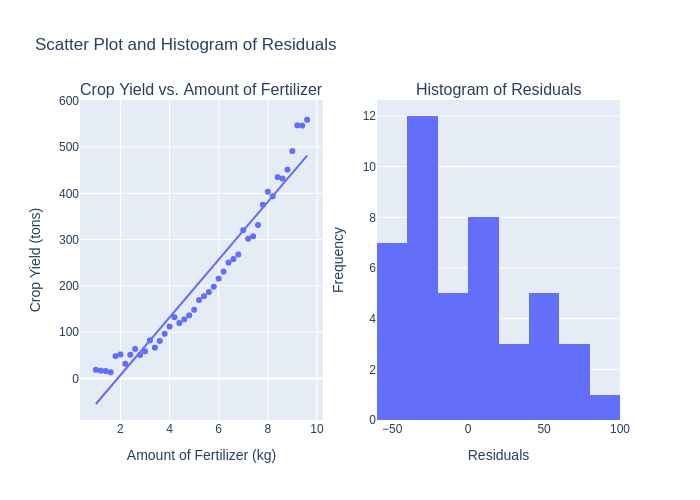

In [9]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. **Linearity**: Simple Linear Regression assumes a linear relationship between the predictor variable (amount of fertilizer) and the response variable (crop yield). However, based on the scatter plot, the relationship appears to be non-linear; the crop yield doesn't increase linearly as fertilizer amount increases. Instead, there seems to be a more complex, possibly exponential or polynomial, trend. This deviation from linearity may lead to poor model fit, as reflected by potentially high residuals and the curvature of the data.

2. **Homoscedasticity (Constant Variance of Errors)**: Simple Linear Regression assumes that the variance of the errors (residuals) is constant across all levels of the predictor variable. However, if you observe a funnel shape in the residual plot or increasing variance as the amount of fertilizer increases, this indicates heteroscedasticity—meaning that the error variance changes with the level of fertilizer. This could result in an uneven spread of residuals, suggesting the model's predictions become less reliable at higher fertilizer amounts.

### Summary of Interactions for Q7

Transcript Log: https://chatgpt.com/share/67207596-9840-8012-8f79-16f070502285

1. **Initial Data Exploration**: You shared a dataset containing two variables: "Amount of Fertilizer (kg)" and "Crop Yield (tons)." We set up a script in Python to analyze and visualize this data using `pandas`, `scipy.stats`, and `plotly`. 

2. **Linear Regression Model**:
   - We created a scatter plot using Plotly Express (`px.scatter`) to show the relationship between fertilizer amount and crop yield, adding a trendline to visualize the linear regression.
   - We calculated the linear regression model parameters (slope, intercept, \( R^2 \) value, \( p \)-value, and standard error) using `scipy.stats.linregress`.
   - We predicted the crop yield values based on the linear regression model, calculated the residuals (actual yield - predicted yield), and added them as a new column to the DataFrame.

3. **Residual Analysis**:
   - A histogram of residuals was created to assess how well the linear model fit the data. This highlighted the distribution of errors (residuals) around the predicted values.

4. **Combined Plot for Visualization**:
   - Using `make_subplots` from Plotly, we combined the scatter plot with trendline and the histogram of residuals into a single figure, allowing a side-by-side comparison of model fit and residual distribution.
   - We discussed using `.show(renderer="png")` to render the plot for use in static formats like GitHub or MarkUs.

5. **Assumptions of Linear Regression**:
   - I noted two assumptions of Simple Linear Regression that don’t align well with this data:
     - **Linearity**: The scatter plot suggested a non-linear relationship between fertilizer amount and crop yield, potentially indicating a need for a more complex model.
     - **Homoscedasticity**: There appeared to be heteroscedasticity in the residuals, as variance increased with fertilizer amounts, making model predictions less reliable at higher levels.

## "Week of Nov04" HW

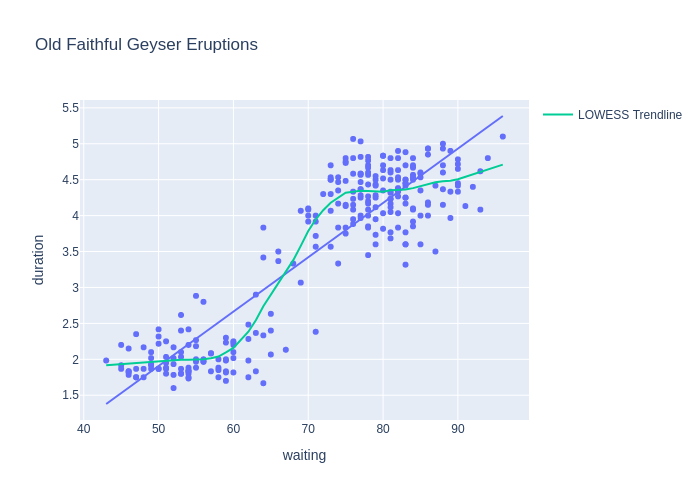

In [10]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Question 8

In [11]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        23:57:23   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The null hypothesis of "no linear association (on average)" in the context of a Simple Linear Regression model the slope of the regression line is zero. Therefore:

- The null hypothesis is 𝐻0: 𝛽1 = 0 where 𝛽1 is the coefficient of waiting in the model.

- The alternative hypothesis 𝐻1: 𝛽1 ≠ 0

From the code above, we can see that the p-value is 0.000, which is less than 0.05. Therefore, we reject the null hypothesis, suggesting that there is evidence of a linear association between waiting time and duration.

### Summary of Interactions for Q8

**Objective**: To assess the linear association between the `waiting` time and `duration` of eruptions in the Old Faithful Geyser dataset using Simple Linear Regression.

1. **Null Hypothesis Specification**:
   - We started by specifying the null hypothesis for "no linear association (on average)" between `waiting` time and `duration`. The null hypothesis \( H_0 \) was that the slope parameter (\( \beta_1 \)) in the linear regression model is zero, meaning there is no linear relationship: 
     \[
     H_0: \beta_1 = 0
     \]
   - The alternative hypothesis \( H_1 \) was that there is a linear association:
     \[
     H_1: \beta_1 \neq 0
     \]

2. **Regression Model Setup and Output Interpretation**:
   - We used Python code to fit an Ordinary Least Squares (OLS) regression model using the formula `duration ~ waiting`. The fitted model summary showed the coefficients, t-values, p-values, and 95% confidence intervals for the intercept and slope.

3. **Key Findings**:
   - **Intercept**: The intercept term was -1.8740, which is the expected `duration` if `waiting` were zero (though this interpretation is not meaningful in practical terms for this dataset).
   - **Slope of `waiting`**: The slope coefficient was 0.0756, suggesting that each additional minute of `waiting` time increases the expected eruption `duration` by 0.0756 minutes.
   - **Statistical Significance**: The p-value for the `waiting` coefficient was effectively zero (p < 0.001), indicating strong statistical significance. This allowed us to reject the null hypothesis of no linear association.
   - **Confidence Interval**: The 95% confidence interval for the slope was [0.071, 0.080], which did not include zero, further supporting evidence of a positive relationship.

4. **Conclusion**:
   - Based on the p-value and confidence interval, we concluded there is strong evidence against the null hypothesis. We observed a positive linear association between `waiting` time and `duration`, indicating that longer waiting times are associated with longer eruption durations for the Old Faithful Geyser.

### Question 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


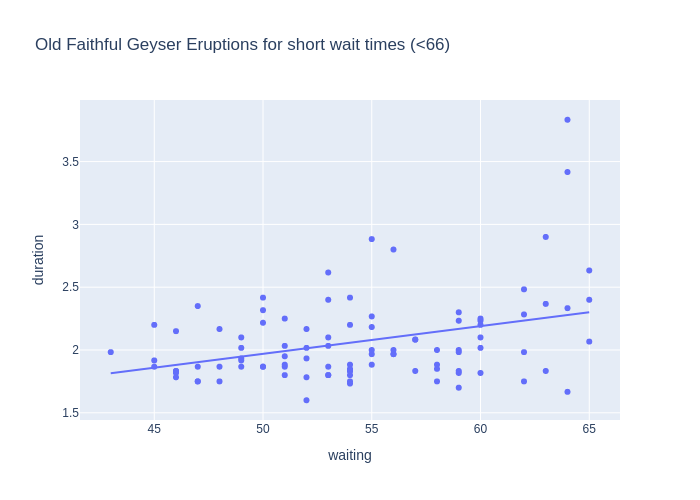

In [12]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. When `short_wait_limit = 62`:
   - Coefficient: \(0.0069\) suggests a slight positive relationship between waiting time and eruption duration.
   - \( p \)-value: \(0.238\), which is greater than \(0.05\), indicates that this relationship is not statistically significant. 
   - Interpretation: At this threshold, the evidence against the null hypothesis is weak, so we cannot conclude a significant relationship between waiting time and duration for wait times under 62 minutes.

2. When `short_wait_limit = 64`:
   - Coefficient: \(0.0114\), showing a slightly stronger positive relationship than for \(62\) minutes.
   - \( p \)-value: \(0.036\), which is below \(0.05\), indicates a statistically significant relationship.
   - Interpretation: This suggests moderate evidence against the null hypothesis. For wait times under 64 minutes, we observe a significant, albeit small, positive relationship between waiting time and eruption duration.

3. When `short_wait_limit = 66`:
   - Coefficient\: \(0.0221\), indicating an even stronger positive relationship between waiting time and eruption duration.
   - \( p \)-value: \(0.000\), well below \(0.05\), indicates very strong statistical significance.
   - Interpretation: With this threshold, there is strong evidence against the null hypothesis. This suggests that for wait times under 66 minutes, waiting time is a significant predictor of eruption duration, with a notable increase in duration as wait time increases.



### Summary of Interactions for Question 9:

Transcript Log: https://chatgpt.com/share/67215521-e064-8012-98b1-fca827d08c72

#### Initial Data Exploration and Visualization

1. **Creating Scatter Plot with Trendlines**: We loaded the Old Faithful Geyser dataset and plotted eruption `duration` against `waiting` time between eruptions. The scatter plot included a linear regression (OLS) trendline and a locally weighted scatterplot smoothing (LOWESS) trendline to explore the overall relationship in the dataset. This initial figure revealed a notable pattern: when the delay exceeds about 63 minutes, eruption duration tends to increase significantly.

2. **Focus on Short Wait Times**: We then narrowed the analysis to only "short" waiting times, examining whether there is still a relationship between `waiting` and `duration` below specific thresholds. We tested limits of 62, 64, and 66 minutes and fitted an OLS regression for each subset to examine the evidence for or against the null hypothesis (no relationship between waiting time and eruption duration).

#### Statistical Analysis of Short Wait Time Subsets

For each threshold (`short_wait_limit = 62`, `64`, and `66`), we ran an OLS regression and observed the following:

- **At `short_wait_limit = 62`**: 
  - **Coefficient**: 0.0069
  - **\( p \)-value**: 0.238 (not statistically significant)
  - **Interpretation**: The relationship between waiting time and duration is weak and not statistically significant, providing little evidence against the null hypothesis.

- **At `short_wait_limit = 64`**:
  - **Coefficient**: 0.0114
  - **\( p \)-value**: 0.036 (statistically significant)
  - **Interpretation**: A moderate positive relationship exists, with evidence against the null hypothesis. This suggests that waiting time may be a predictor of duration, though the effect size is small.

- **At `short_wait_limit = 66`**:
  - **Coefficient**: 0.0221
  - **\( p \)-value**: 0.000 (strong statistical significance)
  - **Interpretation**: A clear positive relationship is observed, providing strong evidence against the null hypothesis. Waiting time is a significant predictor of eruption duration, with a noticeable increase in duration as wait time increases.

#### Overall Summary

The analysis shows that as the threshold for short wait times increases, the strength and statistical significance of the relationship between waiting time and eruption duration become more pronounced. This implies that even within short intervals, waiting time positively correlates with eruption duration, especially as the threshold moves closer to the general pattern observed in the full dataset. 

### Question 10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


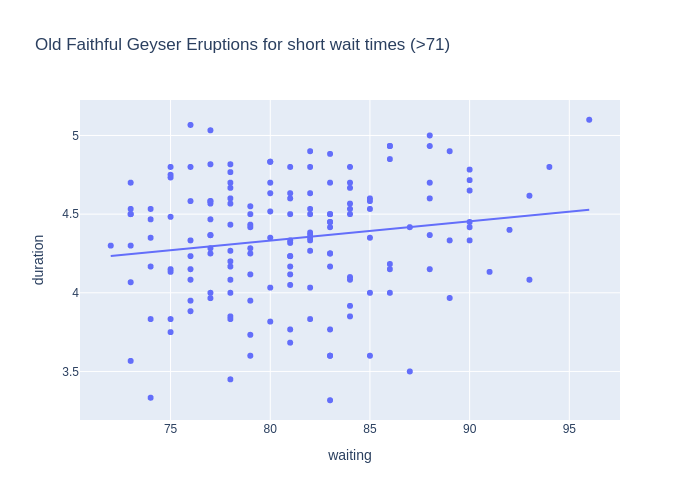

In [13]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

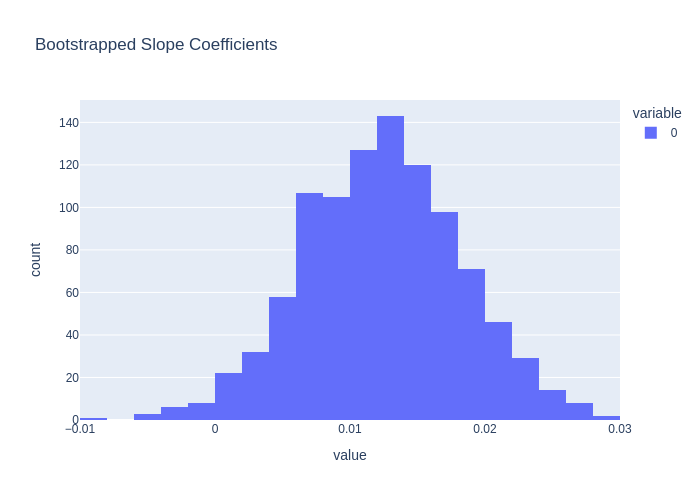

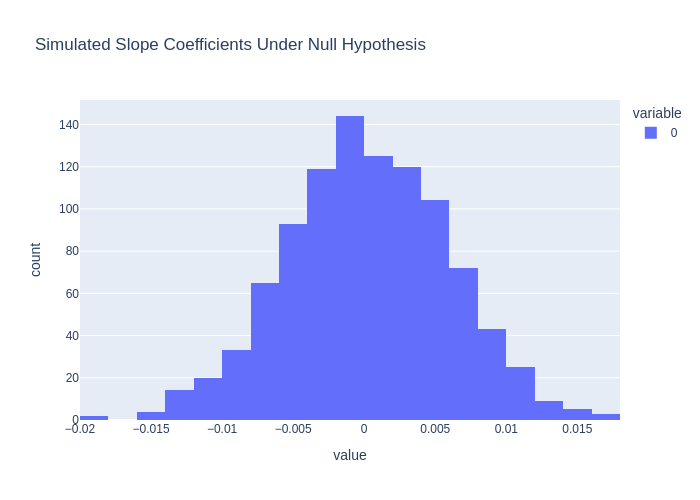

95% Bootstrapped Confidence Interval for Slope: (0.0008, 0.0240)
Does the confidence interval contain 0? No
Observed Slope Coefficient: 0.0122
Simulated p-value under null hypothesis: 0.0330


In [14]:
n_bootstraps = 1000  # Number of bootstrap samples
bootstrapped_slope_coefficients = []

for _ in range(n_bootstraps):
    # Create a bootstrap sample
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    # Fit a linear model to the bootstrap sample
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    # Collect the slope coefficient
    bootstrapped_slope_coefficients.append(bootstrap_model.params['waiting'])

# Visualize the bootstrapped slope coefficients
fig1 = px.histogram(bootstrapped_slope_coefficients, nbins=30, title="Bootstrapped Slope Coefficients")
fig1.show(renderer="png")

# Part 2: Simulated sampling distribution under the null hypothesis (no linear association)
beta_0 = 1.65
beta_1 = 0
sigma = 0.37
simulated_slope_coefficients = []

for _ in range(n_bootstraps):
    # Copy the long-wait dataset and generate Y values under null hypothesis (no linear association)
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = beta_0 + beta_1 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=sigma).rvs(size=long_wait.sum())
    
    # Fit a linear model to the simulated data
    simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    # Collect the slope coefficient from the simulated model
    simulated_slope_coefficients.append(simulated_model.params['waiting'])

# Visualize the simulated slope coefficients
fig2 = px.histogram(simulated_slope_coefficients, nbins=30, title="Simulated Slope Coefficients Under Null Hypothesis")
fig2.show(renderer="png")

# Part 3: Calculate 95% bootstrapped confidence interval and simulated p-value
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# 95% bootstrapped confidence interval for the slope
ci_lower, ci_upper = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
contains_zero = ci_lower <= 0 <= ci_upper

# Observed slope coefficient from actual long-wait data
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params['waiting']

# Simulated p-value
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Print results
print(f"95% Bootstrapped Confidence Interval for Slope: ({ci_lower:.4f}, {ci_upper:.4f})")
print(f"Does the confidence interval contain 0? {'Yes' if contains_zero else 'No'}")
print(f"Observed Slope Coefficient: {observed_slope:.4f}")
print(f"Simulated p-value under null hypothesis: {simulated_p_value:.4f}")

The simulated p-value is 0.033 which does not match the p-value of 0.038 from the table above, but they are close. 

### Summary of Interactions for Q10

Transcript Log: https://chatgpt.com/share/67215521-e064-8012-98b1-fca827d08c72 (I used the same chatbot conversation from the previous question, therefore you might need to scroll down a bit to see the content for this question)

1. **Old Faithful Geyser Analysis**:
   - You explored the relationship between eruption duration and waiting time for the Old Faithful geyser using a dataset from Seaborn. You created scatter plots with linear regression and LOWESS trendlines to visualize the data.

2. **Statistical Analysis of Short Wait Times**:
   - You analyzed subsets of the dataset by restricting wait times to shorter intervals (62, 64, 66 minutes) and reported slope coefficients and p-values for each. You interpreted these values to assess the strength of the linear relationship between waiting time and eruption duration.

3. **Long Wait Time Analysis**:
   - You provided code to analyze long wait times (greater than 71 minutes). You intended to bootstrap samples and simulate data under the null hypothesis of no linear association. 

4. **Bootstrapping and Simulation**:
   - You received guidance on creating fitted Simple Linear Regression models using bootstrapped samples. The approach included collecting and visualizing the distribution of slope coefficients, simulating samples under a null hypothesis, and calculating confidence intervals and p-values.

5. **Implementation**:
   - You received a complete code snippet that included:
     - Creating bootstrap samples from the long wait times dataset.
     - Simulating a dataset assuming no linear association and fitting linear models.
     - Calculating and visualizing the distribution of slope coefficients, confidence intervals, and p-values.

6. **Interpretation of Results**:
   - You were guided on how to interpret the results from the bootstrapped confidence intervals and simulated p-values, assessing the evidence for or against the null hypothesis regarding the linear relationship between waiting time and eruption duration.

### Question 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.2979,0.031,136.594,0.000,4.236,4.360
"C(kind, Treatment(reference=""long""))[T.short]",-2.2036,0.052,-42.464,0.000,-2.306,-2.101


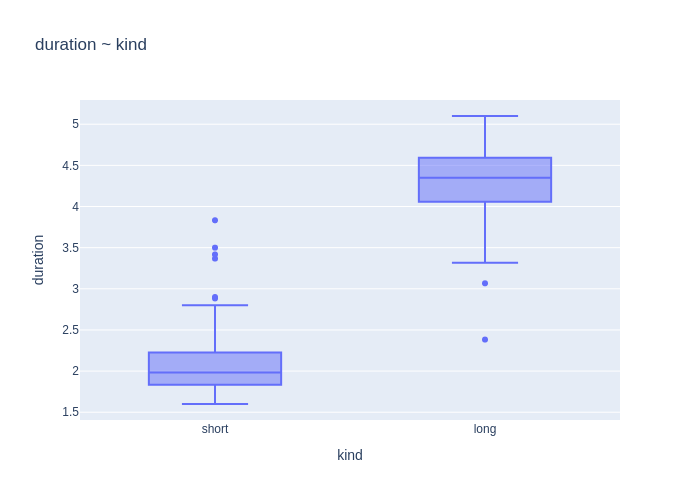

In [20]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="long"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [16]:
display(smf.ols('duration ~ waiting', data=old_faithful).fit().summary().tables[1])
display(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])
display(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.8740,0.160,-11.702,0.000,-2.189,-1.559
waiting,0.0756,0.002,34.089,0.000,0.071,0.080


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.8619,0.327,2.637,0.010,0.213,1.511
waiting,0.0221,0.006,3.704,0.000,0.010,0.034


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3520,0.476,7.049,0.000,2.413,4.291
waiting,0.0122,0.006,2.091,0.038,0.001,0.024


Each of the three models above directly relates duration to waiting with a slope parameter that captures the strength of the linear relationship in that specific context (full, short, or long waits). 

In contrast, the indicator variable model does not assume a continuous linear relationship between waiting time and duration across all values of waiting. Instead, it compares the mean eruption duration between the "short" and "long" wait time groups. 

From the new indicator variable model, the p-values are very low (0.000) for both "long" and "short" group coefficient , indicating that this difference is statistically significant. This provides strong evidence against the null hypothesis of "no difference between groups on average."

### Summary of Interactions for Q11

1. **Initial Exploratory Analysis**: 
   - We began by examining the relationship between waiting time (`waiting`) and eruption duration (`duration`) using the "Old Faithful Geyser" dataset. 
   - A scatter plot with a linear regression trendline and a LOWESS trendline were created to visualize this relationship, showing that eruption duration tends to increase with longer waiting times.

2. **Subset Analysis of Short Wait Times**:
   - We restricted the dataset to shorter wait times (below specific thresholds: 62, 64, and 66 minutes) to determine if a similar relationship exists within shorter intervals.
   - The linear regression model for each threshold showed varying strength of association:
      - For a 62-minute limit, the slope was 0.0069 (p-value = 0.238, suggesting weak evidence against the null hypothesis).
      - For a 64-minute limit, the slope increased to 0.0114 (p-value = 0.036, indicating moderate evidence against the null).
      - For a 66-minute limit, the slope was 0.0221 (p-value = 0.000, showing strong evidence against the null).
   - This progression suggests that the relationship between waiting time and duration becomes more apparent as the threshold for "short wait" increases.

3. **Analysis of Long Wait Times**:
   - We then examined "long" wait times (over 71 minutes) with a similar approach.
   - Code was provided to:
      - Bootstrap slope coefficients from linear regression models fitted to long wait times.
      - Simulate slope coefficients under the null hypothesis of no association (using specified values of β₀ = 1.65, β₁ = 0, and σ = 0.37).
      - Construct a 95% confidence interval from bootstrapped slope coefficients.
      - Calculate a simulated p-value for the null hypothesis.
   - These steps aimed to quantify the strength of evidence against the null hypothesis that waiting time and eruption duration are unrelated within the context of long wait times.

4. **Indicator Variable Model with "Short" and "Long" Waits**:
   - We redefined "short" and "long" wait times with a threshold of 68 minutes, assigning a categorical variable (`kind`) to label each observation as either "short" or "long."
   - Using the model specification:
     \[
     Y_i = \beta_{\text{intercept}} + 1["\text{long}"](k_i)\beta_{\text{contrast}} + \epsilon_i
     \]
   - We estimated the mean eruption duration for each category.
   - Results indicated a statistically significant difference between the two groups:
      - The intercept (2.0943) represents the mean duration for "short" waits.
      - The "long" wait coefficient (2.2036) represents the mean difference in duration, suggesting "long" waits are associated with ~2.2 minutes longer eruptions.
      - The confidence interval (2.101 to 2.306) and p-value (0.000) indicated strong evidence against the null hypothesis of no difference between groups.

5. **Comparative Summary**:
   - The initial continuous-variable models explored the linear association between `waiting` and `duration`.
   - The subset models for short and long waits helped determine that the relationship varies depending on the wait length.
   - The indicator variable model directly compared mean durations for "short" and "long" categories, providing a clear view of the categorical difference between these groups.

### Question 12

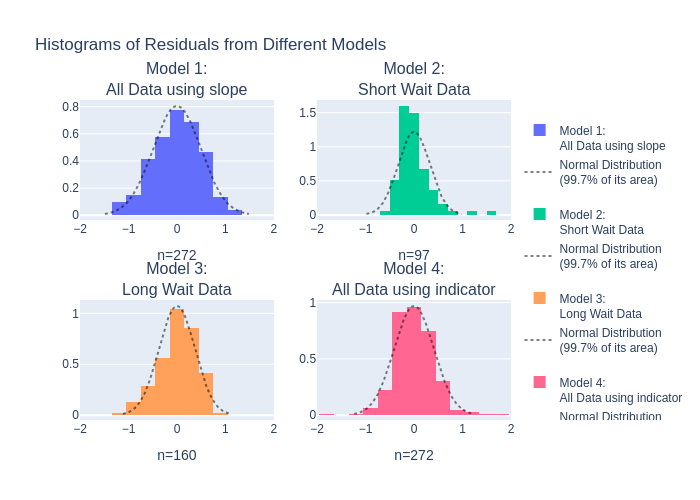

In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The histogram for Model 1 shows a symmetric, bell-shaped distribution with residuals that closely follow the dotted normal curve. This suggests that the residuals in Model 1 are approximately normally distributed, supporting the assumption of normality.

The histogram for Model 2 has a narrower, less symmetric shape, with a slight skew and some outliers. The distribution deviates from the normal curve, suggesting that the residuals are not normally distributed for this subset of the data.

Model 3’s histogram shows a peak at the center but with a rightward skew and a wider spread in the tails compared to the normal curve. This suggests non-normality in the residuals, likely due to the distribution being asymmetric.

Model 4 has a more symmetric shape but a slightly wider spread, particularly at the tails, compared to the normal curve. Although it is closer to a bell shape than Models 2 and 3, it still shows some deviation from normality, especially in the tails.

Conclusion: Model 1 best supports the assumption that the distribution of error terms is normal, as its residuals closely follow the normal curve. The other three models do not support this assumption due to skewness, tail deviation, or outliers in their residual distributions.

### Summary of Interactions for Q12

1. **Image Interpretation and Analysis of Residual Distributions**:
   - I uploaded an image of four histograms showing the residuals from different models labeled Model 1 through Model 4. Each histogram also displayed a normal distribution curve for comparison.
   - I asked for an analysis to determine which model supports the assumption of normally distributed error terms and explanations for why other models might not meet this assumption.

2. **Model-by-Model Analysis**:
   - The assistant provided a detailed analysis for each model:
     - **Model 1**: Residuals followed a symmetric, bell-shaped distribution aligning closely with the normal curve, supporting the assumption of normality.
     - **Model 2**: Displayed a narrower and less symmetric shape with slight skew and outliers, indicating non-normal residuals.
     - **Model 3**: Showed rightward skew and wider tail spread, deviating from normality.
     - **Model 4**: Was closer to a normal shape but had slight tail deviation, suggesting only partial alignment with normality.
   
3. **Conclusion**:
   - The assistant concluded that **Model 1** best supports the assumption of normally distributed error terms, while the other models deviate due to factors like skewness, tail spread, or outliers.


### Question 13

Observed mean difference: 2.2036002325581396
Permutation test p-value: 0.0


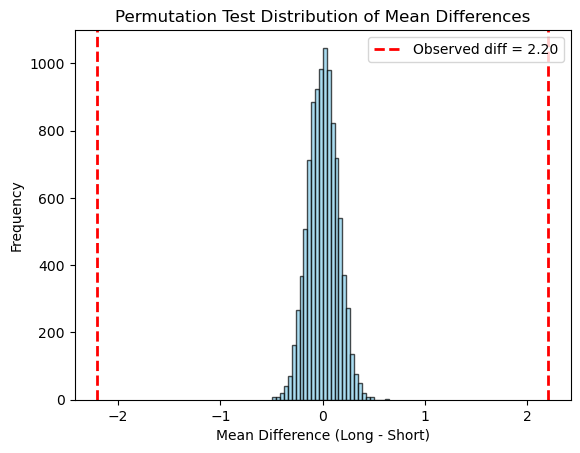

Bootstrap 95% Confidence Interval: (2.103032156976745, 2.2995495232558136)


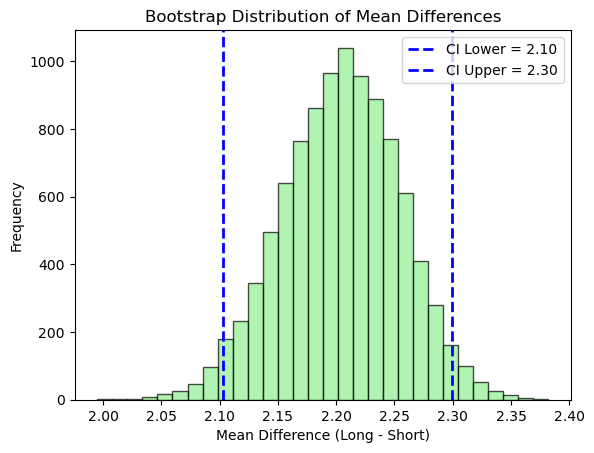

In [22]:
short_durations = old_faithful[old_faithful['kind'] == 'short']['duration'].values
long_durations = old_faithful[old_faithful['kind'] == 'long']['duration'].values

# Observed difference in means
observed_mean_diff = np.mean(long_durations) - np.mean(short_durations)

# Part (A): Permutation Test
# -------------------------------------------------
def permutation_test(iterations=10000):
    combined = np.concatenate([short_durations, long_durations])
    n_short = len(short_durations)
    permuted_diffs = []
    
    for _ in range(iterations):
        np.random.shuffle(combined)  # Shuffle the combined data
        perm_short = combined[:n_short]
        perm_long = combined[n_short:]
        perm_mean_diff = np.mean(perm_long) - np.mean(perm_short)
        permuted_diffs.append(perm_mean_diff)
    
    permuted_diffs = np.array(permuted_diffs)
    
    # Calculate the p-value
    p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_mean_diff))
    return permuted_diffs, p_value

# Run the permutation test
permuted_diffs, p_value = permutation_test()
print(f"Observed mean difference: {observed_mean_diff}")
print(f"Permutation test p-value: {p_value}")

# Visualization of Permutation Test Results
import matplotlib.pyplot as plt

plt.hist(permuted_diffs, bins=30, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(observed_mean_diff, color='red', linestyle='dashed', linewidth=2, label=f"Observed diff = {observed_mean_diff:.2f}")
plt.axvline(-observed_mean_diff, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Mean Difference (Long - Short)")
plt.ylabel("Frequency")
plt.title("Permutation Test Distribution of Mean Differences")
plt.legend()
plt.show()

def bootstrap_confidence_interval(iterations=10000):
    bootstrapped_mean_diffs = []
    
    for _ in range(iterations):
        boot_short = np.random.choice(short_durations, size=len(short_durations), replace=True)
        boot_long = np.random.choice(long_durations, size=len(long_durations), replace=True)
        boot_mean_diff = np.mean(boot_long) - np.mean(boot_short)
        bootstrapped_mean_diffs.append(boot_mean_diff)
    
    bootstrapped_mean_diffs = np.array(bootstrapped_mean_diffs)
    ci_lower, ci_upper = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])
    
    return bootstrapped_mean_diffs, (ci_lower, ci_upper)

# Run the bootstrap confidence interval calculation
bootstrapped_mean_diffs, confidence_interval = bootstrap_confidence_interval()
print(f"Bootstrap 95% Confidence Interval: {confidence_interval}")

# Visualization of Bootstrap Results
plt.hist(bootstrapped_mean_diffs, bins=30, alpha=0.7, color="lightgreen", edgecolor="black")
plt.axvline(confidence_interval[0], color='blue', linestyle='dashed', linewidth=2, label=f"CI Lower = {confidence_interval[0]:.2f}")
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f"CI Upper = {confidence_interval[1]:.2f}")
plt.xlabel("Mean Difference (Long - Short)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Mean Differences")
plt.legend()
plt.show()

(a) Explanation of Sampling Approaches

Permutation Test: The permutation test relies on randomizing the group labels to simulate the null hypothesis. It tests whether any observed difference could simply be due to chance, without assuming any specific distribution of the data.

Bootstrap Confidence Interval: The bootstrap method uses resampling within each group to construct a distribution of possible mean differences. It provides an empirical confidence interval, which can be used for inference about the difference in means.

(b) Comparison with Indicator Variable Model Approach

In the indicator variable model, we fit a linear regression model where a categorical variable (kind) distinguishes between "short" and "long" groups.
This approach estimates the mean difference between groups by interpreting the coefficient for the indicator variable as the difference between the two groups.
It directly incorporates both groups within a single model, assuming a linear model structure and interpreting the coefficient as a measure of group effect.
Similarities:

Both the indicator variable model and bootstrap confidence interval aim to estimate the mean difference between groups.
The permutation test and indicator model both test the null hypothesis of no difference between groups, albeit using different methodologies.
Differences:

### Summary of Interactions for Q13

1. **Initial Task and Data Analysis on Old Faithful Dataset**:
   - We started with analyzing the Old Faithful Geyser dataset using Simple Linear Regression (SLR) models. You explored models that predicted eruption duration based on waiting times, using various waiting time thresholds to define "short" and "long" wait times.

2. **Exploring Different Waiting Time Thresholds**:
   - You experimented with different thresholds (e.g., 62, 64, 66, etc.) to define "short" waiting times and analyzed the impact on the regression slope and p-values. We discussed the significance of the slope and p-values as they changed with different thresholds, interpreting these as an indication of the strength of association between waiting time and eruption duration.

3. **Dividing Wait Times Using an Indicator Variable**:
   - We then explored a new model using an indicator variable approach, which allowed for comparing mean durations between "short" and "long" wait times by categorizing waiting times as either less than 68 ("short") or greater than/equal to 68 ("long"). This model used a categorical variable to assess if there was an average difference in duration based on the wait time category, offering an alternative to the continuous regression models previously used.
   - We examined the statistical output of this model and discussed its interpretation, focusing on the coefficient for the "long" indicator variable, which represented the difference in mean duration between the "short" and "long" categories.

4. **Permutation Test for Difference in Means**:
   - For further analysis, you conducted a permutation test to assess the null hypothesis of no difference in eruption duration between "short" and "long" groups. In this test, labels were shuffled to simulate the null hypothesis, and the resulting distribution of mean differences allowed for the calculation of a p-value.
   - I provided code to perform the permutation test and visualize the distribution of permuted mean differences.

5. **Bootstrap Confidence Interval for Difference in Means**:
   - We also implemented a bootstrap approach to calculate a 95% confidence interval for the difference in mean eruption durations between the two groups. By resampling within each group and calculating the mean difference for each sample, a bootstrap distribution of mean differences was created, allowing for the estimation of the confidence interval.
   - I provided code for this bootstrap approach and helped you visualize the results.

6. **Comparison of Indicator Variable Model with Permutation and Bootstrap Tests**:
   - Finally, we discussed the differences between the indicator variable model and the non-parametric methods (permutation and bootstrap tests). The indicator model used a categorical regression approach to directly estimate and test the difference between groups, whereas the permutation and bootstrap methods provided non-parametric alternatives that did not assume linear relationships or normality.
   - The comparison highlighted the flexibility of the non-parametric methods in testing differences in means without relying on linear model assumptions, providing a broader perspective on analyzing group differences.

### Question 14:

Yes